# Password and hijacked email


### This project was proposed by [Vincent Granville](http://www.datasciencecentral.com/forum/topics/password-dataset-for-you-to-test-your-data-science-skills) to challenge your data science skills. Basically one should try to answer the following three questions:

- What are the most common patterns found in passwords?
- Based on these patterns, how to build robust yet easy-to-remember passwords?
- Does this password data set look OK, or do you think it is somewhat inaccurate or not representative of the password universe? If not, can we still draw valid conclusions from this data set, and how?

Data is available [here](http://www.dazzlepod.com/site_media/txt/passwords.txt)

## Step 1. Load Packages

In [126]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Step 2. Load Data

In [2]:
import urllib2

url= 'http://www.dazzlepod.com/site_media/txt/passwords.txt'
response = urllib2.urlopen(url)
print response.info()

Server: nginx
Date: Tue, 22 Nov 2016 00:39:04 GMT
Content-Type: text/plain; charset=utf-8
Content-Length: 20163399
Last-Modified: Sun, 27 Mar 2016 05:04:06 GMT
Connection: close
Vary: Accept-Encoding
ETag: "56f769c6-133ab47"
Expires: Tue, 29 Nov 2016 00:39:04 GMT
Cache-Control: max-age=604800
Accept-Ranges: bytes



In [3]:
# save into file in case lost the connection 
rawfile = open('passwords.txt', 'r+')
rawfile.truncate()
for line in response.read():
    rawfile.write(line)
rawfile.close()   

In [4]:
# open the file and check the first 20 lines
fh = open('passwords.txt', 'r+')

for line in fh.readlines()[:20]:
    print line    

#

# This is a list of 2,151,220 unique ASCII passwords in sorted order according

# to their native byte values using UNIX sort command.

#

# This list (also known as wordlist, password dictionary or password list)

# is useful for password recovery tools such as John the Ripper, oclHashcat

# and Aircrack-ng. To use this file, be sure to first remove these comment

# lines, i.e. the lines starting with # character.

#

# If you are looking for a better password dictionary,

# see http://dazzlepod.com/uniqpass/

#

# $DateTime: 2016/03/27 16:04:06 $

#

# Comments/Questions? Send to disclosure@dazzlepod.com

#

!

! love you

!!

!!!



In [5]:
# to get help pd.read_csv?
passwords = pd.read_csv('passwords.txt',header=None, skiprows=16, names=['password'])  

# Step 3. Explore the Data

In [6]:
passwords.head(5)

,password
0,!
1,! love you
2,!!
3,!!!
4,!!!!!


In [7]:
passwords.tail(5)

,password
2151200,~~sstux
2151201,~~zhou075278
2151202,~~~~
2151203,~~~~~
2151204,~~~~~~


In [8]:
passwords.shape

(2151205, 1)

In [9]:
# check how many unique passwords
uniq_passwords = passwords.password.unique()
uniq_passwords.shape

(2150218L,)

**NOTE**: From the above briefly exploration, we know that we have successfully loaded the data. The total number of records is 2,151,205 which is exactly the number as described. There are 2,150,218 unique records, suggesting only a small subset of passwords has duplication.

## Step 4. Data Preprocess

To gain more inside about the passwords, I will prepocess the password. To facilitate the preprocessing, I have create a few helper functions to check if the password contains letters, capital letters, numbers as well as symbols.

In [10]:
# define some helper functions

import re
def hasLetters(x):
    return any(re.match('[a-zA-Z]', char) for char in str(x))

def hasCapLetters(x):
    return any(re.match('[A-Z]', char) for char in str(x))

def hasNumbers(x):
    return any(char.isdigit() for char in str(x)) 

def hasSymbols(x):
    sym = set('~!@#$%^&*(){}:.[]`;,"=<>\\/_ ?+-|\'')
    return any((c in sym) for c in str(x))

Add five columns (hasLetters, hasCapLetters, HasNumbers, hasSymbols, length) into the existing dataframe. As you will find out, the datatype of the first four columns is boolean and the data type of length is integer.

In [11]:
# add more columns

passwords['hasLetters'] = passwords.password.map(lambda x: hasLetters(x))
passwords['hasCapLetters'] = passwords.password.map(lambda x: hasCapLetters(x))
passwords['hasNumbers'] = passwords.password.map(lambda x: hasNumbers(x))
passwords['hasSymbols'] = passwords.password.map(lambda x: hasSymbols(x))
passwords['length'] = passwords.password.map(lambda x: len(str(x)))

In [12]:
# check how the data look now

passwords.head(5)

,password,hasLetters,hasCapLetters,hasNumbers,hasSymbols,length
0,!,False,False,False,True,1
1,! love you,True,False,False,True,10
2,!!,False,False,False,True,2
3,!!!,False,False,False,True,3
4,!!!!!,False,False,False,True,5


# Step 5. Analyze the Data

## 5.1. Analysis of the password length 

In [152]:
# check minimal length

print "The minimal password length is: {}".format(passwords['length'].min())

The minimal password length is: 1


In [153]:
# check maximal length

print "The maximal password length is: {}".format(passwords['length'].max())

The maximal password length is: 35


In [154]:
# check how does the longest password look like

passwords[passwords['length'] == 35]

,password,hasLetters,hasCapLetters,hasNumbers,hasSymbols,length,pctLetters,pctSymbols,pctNumbers
1029,==)!)(=\r\n><script>alert(1)</script>,True,False,True,True,35,48.57,42.86,2.86


In [157]:
# check the average length of password

print "The average length of password is: {}".format(passwords['length'].mean())
print "The standard deviation of average password length is: {}".format(passwords['length'].std())

The average length of password is: 8.37062065215
The standard deviation of average password length is: 1.99751382236


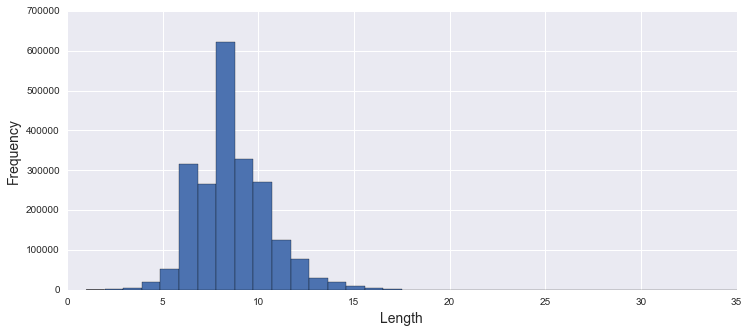

In [161]:
# check the length distribution

fig = plt.figure(figsize=(12,5)) 
plt.hist(passwords.length, bins=35)

plt.ylabel('Frequency', fontsize = 14)
plt.xlabel('Length', fontsize=14)

plt.show()

**NOTE**: After analyzing the password length, we know that the average length is about 8. The majority of passwords have length from 6 to 10. There are a few extrem cases such as the one one with length 35.

## 5.2. Analysis the basic composition of passwords

In [162]:
# check what percent password has number

total_rec = passwords.shape[0]
pct_number = passwords[passwords['hasNumbers']==True].shape[0] / float(total_rec) * 100
print "The percentage of password has number is: {:.2f}%".format(pct_number)

The percentage of password has number is: 72.81%


In [163]:
# check what percent password has letter

pct_letter = passwords[passwords['hasLetters']==True].shape[0] / float(total_rec) * 100
print "The percentage of password has letter is: {:.2f}%".format(pct_letter)

The percentage of password has letter is: 76.44%


In [164]:
# check what percent password has capital letter

pct_capletter = passwords[passwords['hasCapLetters']==True].shape[0] / float(total_rec) * 100
print "The percentage of password has capital letter is: {:.2f}%".format(pct_capletter)

The percentage of password has capital letter is: 9.53%


In [165]:
# check what percent password has symbol

pct_symbol = passwords[passwords['hasSymbols']==True].shape[0] / float(total_rec) * 100
print "The percentage of password has symbol is: {:.2f}%".format(pct_symbol)

The percentage of password has symbol is: 3.06%


In [166]:
# check what percent password has number only

pct_numonly = passwords[(passwords['hasLetters']==False)& (passwords['hasSymbols']==False)].shape[0] / float(total_rec) * 100
print "The percentage of password has number only is: {:.2f}%".format(pct_numonly)

The percentage of password has number only is: 23.23%


In [167]:
pct_all = passwords[(passwords['hasLetters']==True)& (passwords['hasSymbols']==True)& (passwords['hasNumbers']==True)] \
          .shape[0] / float(total_rec) * 100
print "The percentage of password has all three components is: {:.2f}% ".format(pct_all)

The percentage of password has all three components is: 1.73% 


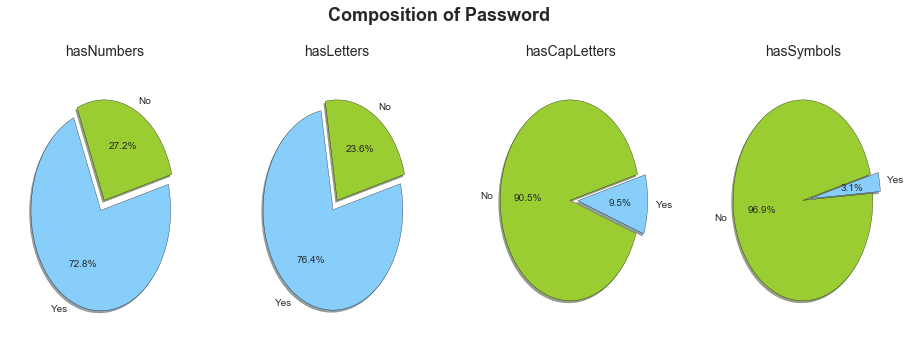

In [204]:
temp1 = passwords['hasNumbers'].value_counts(ascending=True, normalize=True)*100
temp2 = passwords['hasLetters'].value_counts(ascending=True, normalize=True)*100
temp3 = passwords['hasCapLetters'].value_counts(ascending=False, normalize=True)*100
temp4 = passwords['hasSymbols'].value_counts(ascending=False, normalize=True)*100

fig = plt.figure(figsize=(16,5))
fig.suptitle('Composition of Password', y=1.05,fontsize=18, fontweight='bold')

labels = ('No', 'Yes')
colors = ['yellowgreen', 'lightskyblue']
explode = (0, 0.1)

ax1 = fig.add_subplot(141)
ax1.set_title("hasNumbers" , fontsize=14)
plt.pie(temp1,explode=explode,autopct='%1.1f%%', colors=colors, labels = labels, shadow=True, startangle=15,\
        radius=.9)

ax2 = fig.add_subplot(142)
ax2.set_title("hasLetters" , fontsize=14)
plt.pie(temp2,explode=explode,autopct='%1.1f%%', colors=colors, labels = labels, shadow=True, startangle=15,\
        radius=.9)


ax3 = fig.add_subplot(143)
ax3.set_title("hasCapLetters" , fontsize=14)
plt.pie(temp3,explode=explode, autopct='%1.1f%%', colors=colors, labels = labels, shadow=True, startangle=15,\
        radius=.9)

ax4 = fig.add_subplot(144)
ax4.set_title("hasSymbols" , fontsize=14)
plt.pie(temp4,explode=explode, autopct='%1.1f%%', colors=colors, labels = labels, shadow=True, startangle=15,\
        radius=.9)

""" # We can also use bar chart
fig = plt.figure(figsize=(12,5))
fig.suptitle('Composition of Password', y=1.05,fontsize=18, fontweight='bold')

ax1 = fig.add_subplot(141)
ax1.set_ylabel('Percentage' , fontsize=14)

ax1.set_title("hasNumbers" , fontsize=14)
temp1.plot(kind='bar', width= 0.3, fontsize=14)
plt.xticks(rotation=50)

ax2 = fig.add_subplot(142, sharey=ax1)
ax2.set_title("hasLetters" , fontsize=14)
temp2.plot(kind = 'bar', width= 0.3, fontsize=14)
plt.xticks(rotation=50)

ax3 = fig.add_subplot(143 , sharey=ax1)
ax3.set_title('hasCapLetters' , fontsize=14)
temp3.plot(kind='bar', width= 0.3 , fontsize=14)
plt.xticks(rotation=50)

ax4 = fig.add_subplot(144, sharey=ax1)
ax4.set_title('hasSymbols' , fontsize=14)
temp4.plot(kind = 'bar', width= 0.3, fontsize=14)
plt.xticks(rotation=50)
"""
plt.show()

**NOTE**: From the above analysis, we know that less than 10% of passwords has capital letters and only about 3% of passwords has special characters (symbols). As you may know that a strong password usually requires at least one capital letter and at least one special characters. This may partitally explain why these passwords were hijacked.

## 5.3. Analysis the detailed composition of each password

To analyze the detailed composition of each password, I have created three functions which calculate the composition percentage of letters, numbers and symbols in each password. 

In [24]:
def pct_letter(x):
    
    l = float(len(str(x)))
    p = 0
    for char in str(x):
        if re.match('[a-zA-Z]', char):
            p += 1
    return round(p / l * 100,2)   

def pct_number(x):
    
    l = float(len(str(x)))
    p = 0
    for char in str(x):
        if str(char).isdigit():
            p += 1
    return round(p / l * 100,2)  

def pct_symbol(x):
    sym = set('~!@#$%^&*(){}:.[]`;,"=<>\\/_ ?+-|\'')
    l = float(len(str(x)))
    p = 0
    for char in str(x):
        if char in sym:
            p += 1
    return round(p / l * 100,2)  

Add three more columns (pctLetters, pctSymbols, pctNumbers) to the dataframe. Each column contains the value of the percentage of corresponding components.

In [25]:
passwords['pctLetters'] = passwords.password.map(lambda x: pct_letter(x))
passwords['pctSymbols'] = passwords.password.map(lambda x: pct_symbol(x))
passwords['pctNumbers'] = passwords.password.map(lambda x: pct_number(x))

Chech how does the data look like 

In [26]:
passwords.head(5)

,password,hasLetters,hasCapLetters,hasNumbers,hasSymbols,length,pctLetters,pctSymbols,pctNumbers
0,!,False,False,False,True,1,0.0,100.0,0.0
1,! love you,True,False,False,True,10,70.0,30.0,0.0
2,!!,False,False,False,True,2,0.0,100.0,0.0
3,!!!,False,False,False,True,3,0.0,100.0,0.0
4,!!!!!,False,False,False,True,5,0.0,100.0,0.0


From my cxploratory process, I know there are only two passwords with length over 30. Since there is only one record for each case, I will remove them for further analysis.

In [104]:
# remove two records 

passwords[passwords['length']>=30]

,password,hasLetters,hasCapLetters,hasNumbers,hasSymbols,length,pctLetters,pctSymbols,pctNumbers
1021,"\r\n""!@!?@*\\r\n""""""""\r\n""132\r\n&A!R&(",True,True,True,True,30,6.67,56.67,10.00
1029,==)!)(=\r\n><script>alert(1)</script>,True,False,True,True,35,48.57,42.86,2.86


In [96]:
df = passwords[passwords['length']<30]

sym_mean = df['pctSymbols'].groupby(df['length']).mean()
let_mean = df['pctLetters'].groupby(df['length']).mean()
num_mean = df['pctNumbers'].groupby(df['length']).mean()

sym_std = df['pctSymbols'].groupby(df['length']).std()
let_std = df['pctLetters'].groupby(df['length']).std()
num_std = df['pctNumbers'].groupby(df['length']).std()

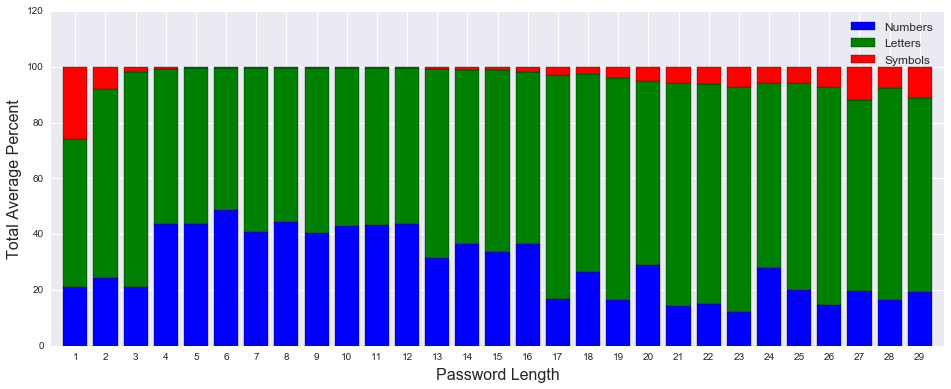

In [210]:
fig, ax = plt.subplots(1, figsize=(16,6))

bar_width = .8

bar_1 = [ i + 1 for i in range(len(len_unique))]

tick_pos = [i + (bar_width/2) for i in bar_1]

ax.bar(bar_1,num_mean, width, color = 'b', label='Numbers') #, yerr=num_std)
ax.bar(bar_1,let_mean, width, bottom=num_mean,  color = 'g', label='Letters') #, yerr=let_std)
ax.bar(bar_1,sym_mean, width, bottom=[i+j for i,j in zip(num_mean,let_mean)], color = 'r', label='Symbols') #, yerr=sym_std)

# set the x ticks with names
plt.xticks(tick_pos, len_unique)

# Set the label and legends
ax.set_ylabel("Total Average Percent", fontsize = 16)
ax.set_xlabel("Password Length", fontsize = 16)
plt.legend(loc='upper right', prop={'size':12})

# Set a buffer around the edge
plt.xlim([min(tick_pos)-bar_width, max(tick_pos)+bar_width])

plt.show()

**NOTE**: For this above figure, we can see that password either short or long has relative high percentage of symbol characters. The password with length range from 5 to 12 has very low percent of special symbol character. As we have see from previous analysis, the passwords with length 6 to 10 are dominate in this dataset. This result may partially explain why these passwords were hijacked.

In [128]:
from IPython.display import HTML

HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Click here to toggle on/off the raw code."></form>''')